# Age vs Vaccinations Administered

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load vaccine data into DataFrame
vaccine_df = pd.read_csv("../Keyana/COVID-19_Vaccinations_in_the_United_States_County.csv")
vaccine_df.head()

,Recip_County,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_5Plus,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus
0,Washburn County,11097.0,10863.0,10368.0,4749.0,10311.0,10105.0,9663.0,4483.0
1,Taylor County,3145.0,3079.0,2966.0,1249.0,2949.0,2887.0,2792.0,1211.0
2,Nassau County,1384503.0,1329779.0,1232671.0,313054.0,1174924.0,1127179.0,1041792.0,268167.0
3,Lampasas County,11660.0,11468.0,10849.0,3920.0,9999.0,9845.0,9330.0,3448.0
4,Saginaw County,NaN,NaN,NaN,NaN,103054.0,101354.0,95769.0,32377.0


In [3]:
# Rename columns
vaccine_df = vaccine_df.rename(columns = {'Recip_County': 'County',
        'Administered_Dose1_Recip_5Plus': 'Administered Dose 1 (5 Plus)',
        'Administered_Dose1_Recip_12Plus': 'Administered Dose 1 (12 Plus)',
        'Administered_Dose1_Recip_18Plus': 'Administered Dose 1 (18 Plus)',
        'Administered_Dose1_Recip_65Plus': 'Administered Dose 1 (65 Plus)',
        'Series_Complete_5Plus': 'Administered Series (5 Plus)',
        'Series_Complete_12Plus': 'Administered Series (12 Plus)',
        'Series_Complete_18Plus': 'Administered Series (18 Plus)',
        'Series_Complete_65Plus': 'Administered Series (65 Plus)'})

vaccine_df

,County,Administered Dose 1 (5 Plus),Administered Dose 1 (12 Plus),Administered Dose 1 (18 Plus),Administered Dose 1 (65 Plus),Administered Series (5 Plus),Administered Series (12 Plus),Administered Series (18 Plus),Administered Series (65 Plus)
0,Washburn County,11097.0,10863.0,10368.0,4749.0,10311.0,10105.0,9663.0,4483.0
1,Taylor County,3145.0,3079.0,2966.0,1249.0,2949.0,2887.0,2792.0,1211.0
2,Nassau County,1384503.0,1329779.0,1232671.0,313054.0,1174924.0,1127179.0,1041792.0,268167.0
3,Lampasas County,11660.0,11468.0,10849.0,3920.0,9999.0,9845.0,9330.0,3448.0
4,Saginaw County,NaN,NaN,NaN,NaN,103054.0,101354.0,95769.0,32377.0
...,...,...,...,...,...,...,...,...,...
1962776,Adams County,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1962777,Harrison County,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1962778,Matagorda County,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1962779,Pleasants County,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [4]:
# Check for duplicates
duplicates = vaccine_df['County'].duplicated
print(duplicates)

<bound method Series.duplicated of 0           Washburn County
1             Taylor County
2             Nassau County
3           Lampasas County
4            Saginaw County
                 ...       
1962776        Adams County
1962777     Harrison County
1962778    Matagorda County
1962779    Pleasants County
1962780     Houghton County
Name: County, Length: 1962781, dtype: object>


In [5]:
# Remove duplicates
vaccine_df = vaccine_df.drop_duplicates(subset=['County'], keep='first')
vaccine_df

,County,Administered Dose 1 (5 Plus),Administered Dose 1 (12 Plus),Administered Dose 1 (18 Plus),Administered Dose 1 (65 Plus),Administered Series (5 Plus),Administered Series (12 Plus),Administered Series (18 Plus),Administered Series (65 Plus)
0,Washburn County,11097.0,10863.0,10368.0,4749.0,10311.0,10105.0,9663.0,4483.0
1,Taylor County,3145.0,3079.0,2966.0,1249.0,2949.0,2887.0,2792.0,1211.0
2,Nassau County,1384503.0,1329779.0,1232671.0,313054.0,1174924.0,1127179.0,1041792.0,268167.0
3,Lampasas County,11660.0,11468.0,10849.0,3920.0,9999.0,9845.0,9330.0,3448.0
4,Saginaw County,NaN,NaN,NaN,NaN,103054.0,101354.0,95769.0,32377.0
...,...,...,...,...,...,...,...,...,...
3276,Swift County,5893.0,5636.0,5277.0,1955.0,5537.0,5299.0,4964.0,1867.0
3277,Stokes County,29136.0,28648.0,27464.0,10293.0,23030.0,22666.0,21725.0,8347.0
3278,Ozark County,3760.0,3723.0,3635.0,1706.0,3055.0,3033.0,2970.0,1402.0
3281,Churchill County,16164.0,15826.0,14980.0,4504.0,13979.0,13710.0,12974.0,3909.0


In [6]:
# Drop NaN 
vaccine_df.dropna()

,County,Administered Dose 1 (5 Plus),Administered Dose 1 (12 Plus),Administered Dose 1 (18 Plus),Administered Dose 1 (65 Plus),Administered Series (5 Plus),Administered Series (12 Plus),Administered Series (18 Plus),Administered Series (65 Plus)
0,Washburn County,11097.0,10863.0,10368.0,4749.0,10311.0,10105.0,9663.0,4483.0
1,Taylor County,3145.0,3079.0,2966.0,1249.0,2949.0,2887.0,2792.0,1211.0
2,Nassau County,1384503.0,1329779.0,1232671.0,313054.0,1174924.0,1127179.0,1041792.0,268167.0
3,Lampasas County,11660.0,11468.0,10849.0,3920.0,9999.0,9845.0,9330.0,3448.0
5,Echols County,1572.0,1537.0,1458.0,366.0,1273.0,1245.0,1182.0,319.0
...,...,...,...,...,...,...,...,...,...
3276,Swift County,5893.0,5636.0,5277.0,1955.0,5537.0,5299.0,4964.0,1867.0
3277,Stokes County,29136.0,28648.0,27464.0,10293.0,23030.0,22666.0,21725.0,8347.0
3278,Ozark County,3760.0,3723.0,3635.0,1706.0,3055.0,3033.0,2970.0,1402.0
3281,Churchill County,16164.0,15826.0,14980.0,4504.0,13979.0,13710.0,12974.0,3909.0


In [7]:
# Sum total vaccinations for each age group
sum_dose1_5 = vaccine_df["Administered Dose 1 (5 Plus)"].sum()
sum_dose1_12 = vaccine_df["Administered Dose 1 (12 Plus)"].sum()
sum_dose1_18 = vaccine_df["Administered Dose 1 (18 Plus)"].sum()
sum_dose1_65 = vaccine_df["Administered Dose 1 (65 Plus)"].sum()

sum_series_5 = vaccine_df["Administered Series (5 Plus)"].sum()
sum_series_12 = vaccine_df["Administered Series (12 Plus)"].sum()
sum_series_18 = vaccine_df["Administered Series (18 Plus)"].sum()
sum_series_65 = vaccine_df["Administered Series (65 Plus)"].sum()


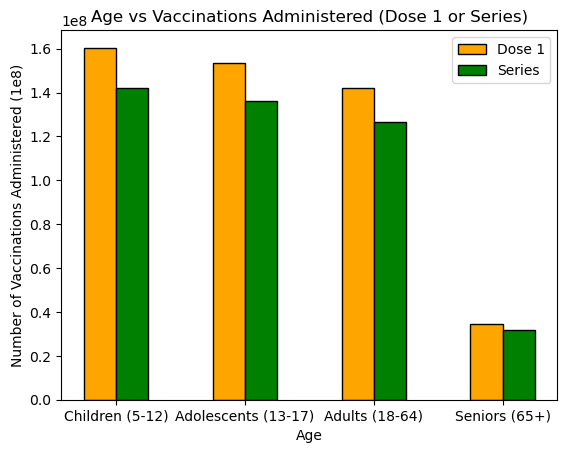

In [16]:
# Plot graph 
vaccines_dose1 = [sum_dose1_5, sum_dose1_12, sum_dose1_18, sum_dose1_65]
vaccines_series = [sum_series_5, sum_series_12, sum_series_18, sum_series_65]

n=4
r = np.arange(n)
width = 0.25

plt.bar(r, vaccines_dose1, color = 'orange',
       width = width, edgecolor = 'black', label='Dose 1')
plt.bar(r + width, vaccines_series, color='g', 
        width = width, edgecolor = 'black', label='Series')

plt.title("Age vs Vaccinations Administered (Dose 1 or Series)")
plt.xlabel("Age")
plt.ylabel("Number of Vaccinations Administered (1e8)")

plt.xticks(r + width/2, ['Children (5-12)', 'Adolescents (13-17)', 'Adults (18-64)', 'Seniors (65+)'])
plt.legend()

plt.show()

In [11]:
print(vaccines_dose1)

[160468933.0, 153440773.0, 142212824.0, 34723497.0]


In [12]:
print(vaccines_series)

[142218870.0, 136328875.0, 126420625.0, 31780772.0]


In [14]:
# Statistical summary for dose 1
mean_dose1_5 = vaccine_df['Administered Dose 1 (5 Plus)'].mean()
median_dose1_5 = vaccine_df['Administered Dose 1 (5 Plus)'].median()
variance_dose1_5 = vaccine_df['Administered Dose 1 (5 Plus)'].var()
std_dev_dose1_5 = vaccine_df['Administered Dose 1 (5 Plus)'].std()
sem_dose1_5 = vaccine_df['Administered Dose 1 (5 Plus)'].sem()

mean_dose1_12 = vaccine_df['Administered Dose 1 (12 Plus)'].mean()
median_dose1_12 = vaccine_df['Administered Dose 1 (12 Plus)'].median()
variance_dose1_12 = vaccine_df['Administered Dose 1 (12 Plus)'].var()
std_dev_dose1_12 = vaccine_df['Administered Dose 1 (12 Plus)'].std()
sem_dose1_12 = vaccine_df['Administered Dose 1 (12 Plus)'].sem()

mean_dose1_18 = vaccine_df['Administered Dose 1 (18 Plus)'].mean()
median_dose1_18 = vaccine_df['Administered Dose 1 (18 Plus)'].median()
variance_dose1_18 = vaccine_df['Administered Dose 1 (18 Plus)'].var()
std_dev_dose1_18 = vaccine_df['Administered Dose 1 (18 Plus)'].std()
sem_dose1_18 = vaccine_df['Administered Dose 1 (18 Plus)'].sem()

mean_dose1_65 = vaccine_df['Administered Dose 1 (65 Plus)'].mean()
median_dose1_65 = vaccine_df['Administered Dose 1 (65 Plus)'].median()
variance_dose1_65 = vaccine_df['Administered Dose 1 (65 Plus)'].var()
std_dev_dose1_65 = vaccine_df['Administered Dose 1 (65 Plus)'].std()
sem_dose1_65 = vaccine_df['Administered Dose 1 (65 Plus)'].sem()

summary_dose1_df = pd.DataFrame({"Mean Dose 1 Vaccine Administered (Age 5+)": mean_dose1_5,
                           "Mean Dose 1 Vaccine Administered (Age 12+)": mean_dose1_12,
                           "Mean Dose 1 Vaccine Administered (Age 18+)": mean_dose1_18,
                           "Mean Dose 1 Vaccine Administered (Age 65+)": mean_dose1_65,
                           "Median Dose 1 Vaccine Administered (Age 5+)": median_dose1_5,
                           "Median Dose 1 Vaccine Administered (Age 12+)": median_dose1_12,
                           "Median Dose 1 Vaccine Administered (Age 18+)": median_dose1_18,
                           "Median Dose 1 Vaccine Administered (Age 65+)": median_dose1_65,
                           "Dose 1 Vaccine Administered Variance (Age 5+)": variance_dose1_5,
                           "Dose 1 Vaccine Administered Variance (Age 12+)": variance_dose1_12,
                           "Dose 1 Vaccine Administered Variance (Age 18+)": variance_dose1_18,
                           "Dose 1 Vaccine Administered Variance (Age 65+)": variance_dose1_65,
                           "Dose 1 Vaccine Administered Std. Dev (Age 5+)": std_dev_dose1_5,
                           "Dose 1 Vaccine Administered Std. Dev (Age 12+)": std_dev_dose1_12,
                           "Dose 1 Vaccine Administered Std. Dev (Age 18+)": std_dev_dose1_18,
                           "Dose 1 Vaccine Administered Std. Dev (Age 65+)": std_dev_dose1_65,
                           "Dose 1 Vaccine Administered Std. Err. (Age 5+)": sem_dose1_5,
                           "Dose 1 Vaccine Administered Std. Err. (Age 12+)": sem_dose1_12,
                           "Dose 1 Vaccine Administered Std. Err. (Age 18+)": sem_dose1_18,
                           "Dose 1 Vaccine Administered Std. Err. (Age 65+)": sem_dose1_65}, index=[0])
summary_dose1_df

,Mean Dose 1 Vaccine Administered (Age 5+),Mean Dose 1 Vaccine Administered (Age 12+),Mean Dose 1 Vaccine Administered (Age 18+),Mean Dose 1 Vaccine Administered (Age 65+),Median Dose 1 Vaccine Administered (Age 5+),Median Dose 1 Vaccine Administered (Age 12+),Median Dose 1 Vaccine Administered (Age 18+),Median Dose 1 Vaccine Administered (Age 65+),Dose 1 Vaccine Administered Variance (Age 5+),Dose 1 Vaccine Administered Variance (Age 12+),Dose 1 Vaccine Administered Variance (Age 18+),Dose 1 Vaccine Administered Variance (Age 65+),Dose 1 Vaccine Administered Std. Dev (Age 5+),Dose 1 Vaccine Administered Std. Dev (Age 12+),Dose 1 Vaccine Administered Std. Dev (Age 18+),Dose 1 Vaccine Administered Std. Dev (Age 65+),Dose 1 Vaccine Administered Std. Err. (Age 5+),Dose 1 Vaccine Administered Std. Err. (Age 12+),Dose 1 Vaccine Administered Std. Err. (Age 18+),Dose 1 Vaccine Administered Std. Err. (Age 65+)
0,87164.004889,83346.427485,77247.595872,18861.2151,15925.0,15509.0,14634.0,4560.0,1.001931e+11,9.103601e+10,7.720119e+10,3.262241e+09,316532.910609,301721.74007,277851.025882,57116.035165,7377.207124,7032.01372,6475.675985,1331.162756


In [15]:
# Summary statistics for series
mean_series_5 = vaccine_df['Administered Series (5 Plus)'].mean()
median_series_5 = vaccine_df['Administered Series (5 Plus)'].median()
variance_series_5 = vaccine_df['Administered Series (5 Plus)'].var()
std_dev_series_5 = vaccine_df['Administered Series (5 Plus)'].std()
sem_series_5 = vaccine_df['Administered Series (5 Plus)'].sem()

mean_series_12 = vaccine_df['Administered Series (12 Plus)'].mean()
median_series_12 = vaccine_df['Administered Series (12 Plus)'].median()
variance_series_12 = vaccine_df['Administered Series (12 Plus)'].var()
std_dev_series_12 = vaccine_df['Administered Series (12 Plus)'].std()
sem_series_12 = vaccine_df['Administered Series (12 Plus)'].sem()

mean_series_18 = vaccine_df['Administered Series (18 Plus)'].mean()
median_series_18 = vaccine_df['Administered Series (18 Plus)'].median()
variance_series_18 = vaccine_df['Administered Series (18 Plus)'].var()
std_dev_series_18 = vaccine_df['Administered Series (18 Plus)'].std()
sem_series_18 = vaccine_df['Administered Series (18 Plus)'].sem()

mean_series_65 = vaccine_df['Administered Series (65 Plus)'].mean()
median_series_65 = vaccine_df['Administered Series (65 Plus)'].median()
variance_series_65 = vaccine_df['Administered Series (65 Plus)'].var()
std_dev_series_65 = vaccine_df['Administered Series (65 Plus)'].std()
sem_series_65 = vaccine_df['Administered Series (65 Plus)'].sem()

summary_series_df = pd.DataFrame({"Mean Series Vaccine Administered (Age 5+)": mean_series_5,
                                  "Mean Series Vaccine Administered (Age 12+)": mean_series_12,
                                  "Mean Series Vaccine Administered (Age 18+)": mean_series_18,
                                  "Mean Series Vaccine Administered (Age 65+)": mean_series_65,
                                  "Median Series Vaccine Administered (Age 5+)": median_series_5,
                                  "Median Series Vaccine Administered (Age 12+)": median_series_12,
                                  "Median Series Vaccine Administered (Age 18+)": median_series_18,
                                  "Median Series Vaccine Administered (Age 65+)": median_series_65,
                                  "Series Vaccine Administered Variance (Age 5+)": variance_series_5,
                                  "Series Vaccine Administered Variance (Age 12+)": variance_series_12,
                                  "Series Vaccine Administered Variance (Age 18+)": variance_series_18,
                                  "Series Vaccine Administered Variance (Age 65+)": variance_series_65,
                                  "Series Vaccine Administered Std. Dev (Age 5+)": std_dev_series_5,
                                  "Series Vaccine Administered Std. Dev (Age 12+)": std_dev_series_12,
                                  "Series Vaccine Administered Std. Dev (Age 18+)": std_dev_series_18,
                                  "Series Vaccine Administered Std. Dev (Age 65+)": std_dev_series_65,
                                  "Series Vaccine Administered Std. Err (Age 5+)": sem_series_5,
                                  "Series Vaccine Administered Std. Err (Age 12+)": sem_series_12,
                                  "Series Vaccine Administered Std. Err (Age 18+)": sem_series_18,
                                  "Series Vaccine Administered Std. Err (Age 65+)": sem_series_65}, index=[0])
summary_series_df

,Mean Series Vaccine Administered (Age 5+),Mean Series Vaccine Administered (Age 12+),Mean Series Vaccine Administered (Age 18+),Mean Series Vaccine Administered (Age 65+),Median Series Vaccine Administered (Age 5+),Median Series Vaccine Administered (Age 12+),Median Series Vaccine Administered (Age 18+),Median Series Vaccine Administered (Age 65+),Series Vaccine Administered Variance (Age 5+),Series Vaccine Administered Variance (Age 12+),Series Vaccine Administered Variance (Age 18+),Series Vaccine Administered Variance (Age 65+),Series Vaccine Administered Std. Dev (Age 5+),Series Vaccine Administered Std. Dev (Age 12+),Series Vaccine Administered Std. Dev (Age 18+),Series Vaccine Administered Std. Dev (Age 65+),Series Vaccine Administered Std. Err (Age 5+),Series Vaccine Administered Std. Err (Age 12+),Series Vaccine Administered Std. Err (Age 18+),Series Vaccine Administered Std. Err (Age 65+)
0,73082.667009,70055.948099,64964.349949,16331.331963,13857.5,13537.0,12764.5,4113.0,7.157485e+10,6.527763e+10,5.528109e+10,2.438465e+09,267534.763346,255494.874723,235119.315179,49380.814285,6064.692758,5791.762899,5329.87336,1119.403935
